In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../src')
import utils

# Machine Learning Models

Many problems in machine learing seek to build a model

$$g(a; x) \approx y$$

given a data set

$$\{(a_1, y_1), \dots, (a_m, y_m)\},$$

with components
* $a_i \in \mathbf{R}^n$ - data features,
* $y_i \in \mathbf{R}$ or $\{0, 1\}$ - data value or class,
* $g: \mathbf{R}^n \to \mathbf{R}$ or $\{0, 1\}$ - prediction function,
* $x \in \mathbf{R}^n$ - model parameters,
* $m$ - number of data points, and
* $n$ - number of data features.

We can fit a model to the given data by solving an optimization problem of the form

$$\min_x \sum_{i=1}^m f_i(g(a_i; x), y_i) + r(x)$$

with components
* $x \in \mathbf{R}^n$ - model parameters,
* $f_i: \mathbf{R}^n \to \mathbf{R}$ - functions that measure how well the model fits the data for a given set of parameters, and
* $r(x): \mathbf{R}^n \to \mathbf{R}$ - regularization function.

# Linear Regression

In the linear regression problem, we would like to find a linear predictor

$$g(a_i; x) = x_1 a_{i1} + \dots + x_n a_{in} = a_i^T x \approx y_i,$$

where both $a_i$ and $y_i$ are continuous.
One approach for deriving the [loss functions](https://en.wikipedia.org/wiki/Loss_function) $f_i$ is to assume a statistical model for the error in the data set, and then develop a [maximum likelihood](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) formulation.
Here we will assume that errors are independently drawn from a normal distribution with mean zero and variance $\sigma^2$, that is, 

$$y_i = a_i^Tx + \epsilon_i, \quad \epsilon_i \sim \mathcal{N}(0, \sigma^2).$$

This means that the probability density function for an observation $(a_i, y_i)$ given model parameters $x$ is

$$p((a_i, y_i); x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - a_i^Tx)^2}{2\sigma^2}\right),$$

and the PDF of all $m$ i.i.d. observations is

\begin{align}
p\big(\{(a_1, y_1), \dots, (a_m, y_m)\}; x\big) &= \prod_{i=1}^m p((a_i, y_i); x) \\
&= \prod_{i=1}^m \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - a_i^Tx)^2}{2\sigma^2}\right) \\
&= \left(\frac{1}{2\pi\sigma^2}\right)^{m/2} \exp\left(-\frac{\sum_{i=1}^m (y_i - a_i^Tx)^2}{2\sigma^2}\right).
\end{align}

Alternatively, we can consider the likelihood of a set of model parameters given our $m$ observations, 

$$\mathcal{L}\big(x; \{(a_1, y_1), \dots, (a_m, y_m)\}\big) = p\big(\{(a_1, y_1), \dots, (a_m, y_m)\}; x\big),$$

so that we can solve an optimization problem to find the parameters with the maximum likelihood. In practice, this is often done by minimizing the negative log-likelihood, which, ignoring the constant coefficient, results in our linear least-squares problem

$$\min_x \sum_{i=1}^m(y_i - a_i^Tx)^2.$$

# Regularization

[Regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics))

Describe purpose of regularization and different types.

Goals:
* Solve ill-posed problem
* Prevent overfitting
* Incorporate prior knowledge (sparsity, smoothness, etc.)

Types:
* Ridge regression (Tikhonov regularization)
* Early stopping (interpreted as regularization in time)
* Lasso
* Elastic net
* Nuclear norms
* Total variation
* Smoothness

Focus on Lasso problem, and introduce need for proximal gradient descent.

# Proximal Gradient Descent

$$min_x f(x) + r(x)$$

$$x^{k+1} = \text{prox}_{\lambda^k r}(x^k - \lambda^k \nabla f(x^k))$$

Where $\lambda^k$ is the step size.

$$(\text{prox}_{\lambda \|\cdot\|_1}(x))_i = \begin{cases} x_i - \lambda & x_i \geq \lambda \\ 0 & |x_i| \leq \lambda \\ x_i + \lambda & x_i < -\lambda \end{cases}$$

$$\text{prox}_{\lambda \|\cdot\|_1}(x) = (x - \lambda)_+ - (-x - \lambda)_+$$

In [ ]:
lam = 1


In [317]:
reload(utils)

<module 'utils' from '../src/utils.py'>

Converged after 234 iteration(s).
Minimum function value: 0.00
Total time: 0.02 secs


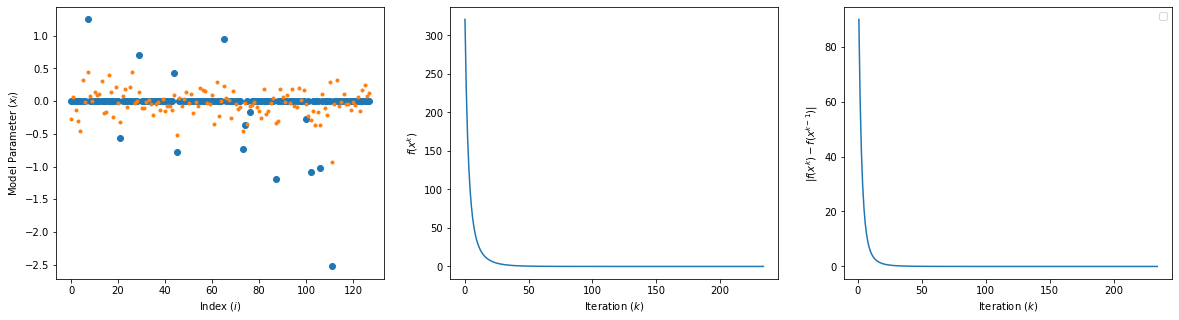

In [320]:
# Show that unregularized linear least-squares doesn't do a good job for a sparse problem

# Problem setup
np.random.seed(0)
m = 50
n = 128
k = 14
A = np.random.randn(m,n)
p = np.random.permutation(n)[:k]
x_true = np.zeros(n)
x_true[p] = np.random.randn(k)
y = A.dot(x_true)

# Gradient descent
results = utils.prox_descent(A, y, lam=0)
utils.plot_pgd(x_true, results)

Converged after 5834 iteration(s).
Minimum function value: 11.82
Total time: 0.35 secs


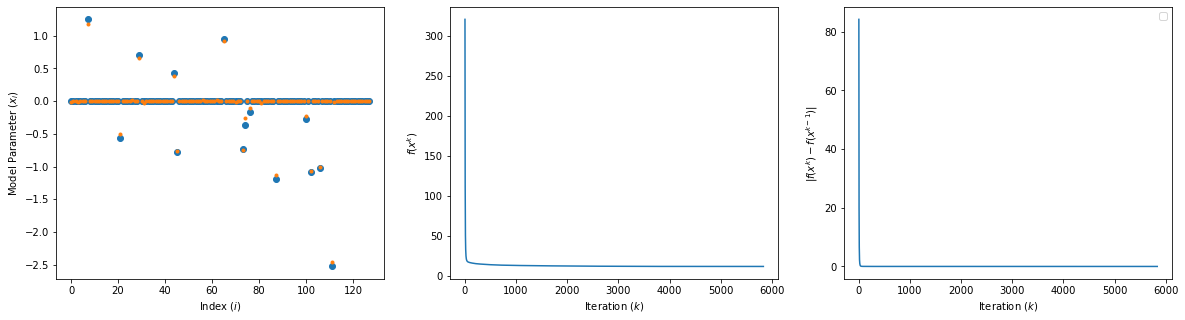

In [324]:
lam = 1 # modify this variable
results = utils.prox_descent(A, y, lam=lam, max_iter=10000)
utils.plot_pgd(x_true, results)

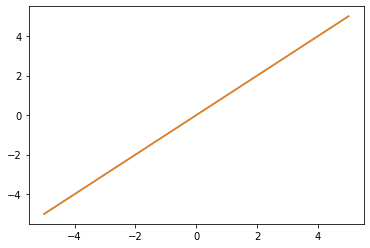

In [217]:
x = np.linspace(-5, 5)
plt.plot(x, prox(x, 0))
plt.plot(x, x)

In [183]:
def prox_descent(lam):
    x = np.zeros(n)
    max_iter = 10000
    tol = 1e-6
    step = 1/(np.linalg.norm(np.transpose(A).dot(A)))
    func_vals = np.zeros(max_iter + 1)
    func_vals[0] = func(x) + lam*np.linalg.norm(x, 1)
    func_diff = np.zeros(max_iter)
    for ii in range(1, max_iter + 1):
        x = prox(x - step*grad(x), lam*step)
        func_vals[ii] = func(x) + lam*np.linalg.norm(x, 1)
        func_diff[ii - 1] = np.abs(func_vals[ii] - func_vals[ii - 1])
        if func_diff[ii - 1] < tol:
            break
    return np.count_nonzero(x), x

In [295]:
step

0.0009677446517135826

Text(0, 0.5, '$|f(x^k) - f(x^{k-1})|$')

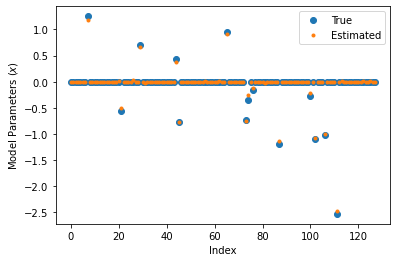

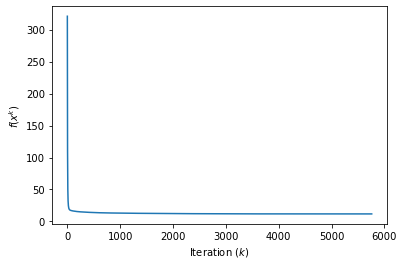

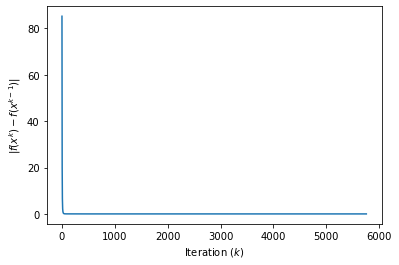

In [294]:
x = np.zeros(n)
max_iter = 10000
tol = 1e-6
lam = 1
step = 1/(np.linalg.norm(np.transpose(A).dot(A)))
func_vals = np.zeros(max_iter + 1)
func_vals[0] = func(x) + lam*np.linalg.norm(x, 1)
func_diff = np.zeros(max_iter)
for ii in range(1, max_iter + 1):
    if lam is None:
        x = x - step*grad(x)
    else:
        x = prox(x - step*grad(x), lam*step)
    func_vals[ii] = func(x) + lam*np.linalg.norm(x, 1)
    func_diff[ii - 1] = np.abs(func_vals[ii] - func_vals[ii - 1])
    if func_diff[ii - 1] < tol:
        break

plt.plot(x_true, 'o')
plt.plot(x, '.')
plt.xlabel('Index')
plt.ylabel('Model Parameters ($x$)')
plt.legend(['True', 'Estimated'], bbox_to_anchor=(1, 1))

plt.figure()
plt.plot(func_vals[:ii+1])
plt.xlabel('Iteration ($k$)')
plt.ylabel('$f(x^k)$')

plt.figure()
plt.plot(func_diff[:ii+1])
plt.xlabel('Iteration ($k$)')
plt.ylabel('$|f(x^k) - f(x^{k-1})|$')

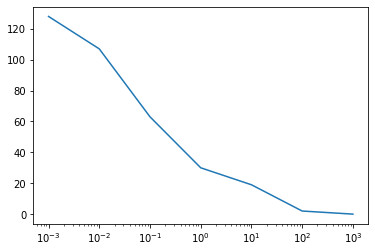

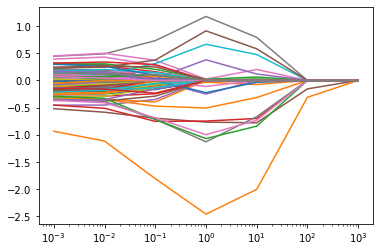

In [292]:
lam_vals = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
nnzero = np.zeros(len(lam_vals))
x_vals = np.zeros((n, len(lam_vals)))
for ii in range(len(lam_vals)):
    results = prox_descent(lam_vals[ii])
    nnzero[ii] = results[0]
    x_vals[:, ii] = results[1]
plt.semilogx(lam_vals, nnzero)
plt.figure()
for ii in range(x_vals.shape[0]):
    plt.semilogx(lam_vals, x_vals[ii, :])

# TODO

2. Simple example
3. Review regularization
4. Simple examples (change regularizer, look at coefficients and results?

What's a good data set to use for these examples?  
Things that sparsity works good for?  
What if we already have enough material, and we really only need the logistic regression notebook?  

Go into regularization for ill-conditioned problems, adding priors like sparsity, or avoiding overfitting?

Talk about train/validation/test sets?

Idea: Introduce regularization, mention some different uses/motivations, then focus on the specific case of sparsity.

Examples can be comparing it to ridge regression and changing the regularization parameter.

We can show a graph of number of nonzero coefficients vs. lambda, etc.

Can't think of other exercises...

We would need to introduce proximal gradient descent for solving Lasso